# <center> PROJETO COVID2 - dados globais

   Em 2019 se iniciou uma pandemia na China, a ela foi dado o nome de Covid-19, que é causada pelo vírus SARS-CoV-2.
Seus sintomas iniciais se assemelham a uma gripe forte, podendo causar perda do olfato e paladar, assim como também em casos
mais graves desenvolverem um grave quadro respiratório de falta de ar, o que pode levar seus pacientes a UTI e consequentemente
á morte.

Atualmente no mundo, mais de 648 milhões de pessoas já testaram positivo para infecção com o vírus, e foram confirmados mais de 6,65 milhões de óbitos.

Este projeto irá utilizar os dados mundial da Covid-19, atualizado até o dia 08/12/2022, para apresentar algumas funções do python para análise de dados.

###### A base de dados utilizada está disponível em: https://covid19.who.int/

### Primeiro, será importado as bibliotecas necessárias para o desenvolvimento.

A primeira parte para iniciar o desenvolvimento do projeto é realizar o import das bibliotecas que serão utilizadas.
o "import" faz o importe da biblioteca e o "as" (como) diz como será o apelido da biblioteca ao ser chamada no código, isso
reduz ter que escrever o nome da biblioteca varias vezes durante o desenvolvimento. Podemos importar a biblioteca toda o apenas alguma dependência.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import urllib
from datetime import datetime
import time

Será atribuido a URL da página web  http://coronavirus.saude.mg.gov.br/images/microdados/xlsx_sistemas.xlsx a variável url.

Em seguida, irei atribuir o resultado da solicitação da página, à variável page com o método request.get(). Passamos a URL da página (que atribuímos à variável url) para esse método.

In [2]:
#O Seaborn consegue criar gráficos com quaisquer mapas de cores da biblioteca matplotlib e também com listas de cores personalizadas.

#define o fundo para o gráfico
sns.set(style="darkgrid")

In [3]:
#Atribuir uma variável ao arquivo .csv 
mundo = 'global.csv'

In [4]:
#DataFrame (quadro de dados)
#para carregar um df(dataframe) de um arquivo csv usando a função do pandas leia: read()
df = pd.read_csv(mundo)

In [5]:
#head() trás as 5 primeiras linhas do arquivo csv
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [6]:
#Para obter o nome das colunas
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [7]:
#Altera o nome das colunas
df.columns = ['Data da atualização', 'Cod do País', 'País','OMS_regiao', 'Novos casos', 'Casos acumulados', 'Novas mortes', 'Mortes acumuladas',]

In [8]:
#Para saber o tipo de dados de cada coluna
df.dtypes

Data da atualização    object
Cod do País            object
País                   object
OMS_regiao             object
Novos casos             int64
Casos acumulados        int64
Novas mortes            int64
Mortes acumuladas       int64
dtype: object

In [9]:
df.head()

,Data da atualização,Cod do País,País,OMS_regiao,Novos casos,Casos acumulados,Novas mortes,Mortes acumuladas
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [10]:
#Para ver as ultimas linhas
df.tail(10)

,Data da atualização,Cod do País,País,OMS_regiao,Novos casos,Casos acumulados,Novas mortes,Mortes acumuladas
253817,2022-11-29,ZW,Zimbabwe,AFRO,28,259192,0,5620
253818,2022-11-30,ZW,Zimbabwe,AFRO,26,259218,0,5620
253819,2022-12-01,ZW,Zimbabwe,AFRO,37,259255,1,5621
253820,2022-12-02,ZW,Zimbabwe,AFRO,30,259285,1,5622
253821,2022-12-03,ZW,Zimbabwe,AFRO,55,259340,0,5622
253822,2022-12-04,ZW,Zimbabwe,AFRO,10,259350,0,5622
253823,2022-12-05,ZW,Zimbabwe,AFRO,6,259356,0,5622
253824,2022-12-06,ZW,Zimbabwe,AFRO,0,259356,0,5622
253825,2022-12-07,ZW,Zimbabwe,AFRO,0,259356,0,5622
253826,2022-12-08,ZW,Zimbabwe,AFRO,0,259356,0,5622


##### Com a tabela criada, e com as informações de cabeçalho e tipo de dados, podemos selecionar algumas colunas para analisar.
###### Para isso, devemos inserir o nome do data frame junto com dois colchetes e, no interior dos colchetes, o nome da coluna ou linha que deseja selecionar.
###### E para selecionar alguma linha específica, utilize: df.loc[1] O número dentros dos colchetes representa a linha a ser selecionada. Lembrando que as linhas e colunas iniciam na posição 0(zero).
##### Para selecionar a linha e a coluna, escolhendo assim somente o elemento que você deseja: df.loc[100,'id']
##### Para obter um conjunto de linhas: df.loc[100:113,'id']


In [11]:
# Para saber quantas colunas o dataframe possui
df.shape

(253827, 8)

In [12]:
#Seleciona o interbvalo de linhas informadas entre[], o i é para dizer que é um indice. Ou seja, iloc: localize as linhas do índice 50 a 55
df.iloc[50:55]

,Data da atualização,Cod do País,País,OMS_regiao,Novos casos,Casos acumulados,Novas mortes,Mortes acumuladas
50,2020-02-22,AF,Afghanistan,EMRO,0,0,0,0
51,2020-02-23,AF,Afghanistan,EMRO,0,0,0,0
52,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
53,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
54,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0


In [13]:
#Esta função mostra estatísticas descritivas, como média, desvio padrão, máximo, mínimo e outras tendências centrais,
# além da forma da distribuição
df.describe()

,Novos casos,Casos acumulados,Novas mortes,Mortes acumuladas
count,2.538270e+05,2.538270e+05,253827.000000,2.538270e+05
mean,2.532924e+03,1.004965e+06,26.100568,1.496600e+04
std,1.609066e+04,4.789353e+06,147.720390,6.601194e+04
min,-8.261000e+03,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,7.640000e+02,0.000000,8.000000e+00
50%,1.700000e+01,2.104400e+04,0.000000,2.640000e+02
75%,4.410000e+02,2.720720e+05,5.000000,4.212000e+03
max,1.265520e+06,9.761839e+07,11447.000000,1.071245e+06


In [14]:
# Quantidade de Países diferentes
df['País'].nunique()

237

In [15]:
#Agrupa os dados e calcula, minimo, maximo, media e mediana.
df.groupby(['OMS_regiao'])['Novas mortes'].agg(['max','min','mean','median'])

,max,min,mean,median
OMS_regiao,,,,
AFRO,844,-8,3.266723,0.0
AMRO,11447,-2437,47.901861,0.0
EMRO,951,0,14.809991,1.0
EURO,2291,-32,32.229285,2.0
Other,2,0,0.012138,0.0
SEARO,6148,-60,68.100331,0.0
WPRO,1290,-35,7.624090,0.0


In [16]:
url = 'https://covid19.who.int/WHO-COVID-19-global-table-data.csv'
mundial = pd.read_csv(url, index_col=0, parse_dates=True, sep=',')
mundial

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,645630482,8283.111669,3261885,41.84833,192915,6634816,85.121325,9502,0.121906,645,NaN
United States of America,Americas,98072469,29628.907000,448634,135.53800,0,1074367,324.580000,2934,0.886000,0,NaN
India,South-East Asia,44675095,3237.315000,1312,0.09500,114,530658,38.453000,25,0.002000,0,NaN
France,Europe,37433359,57554.932000,434884,668.64700,10878,156247,240.235000,623,0.958000,167,NaN
Germany,Europe,36812671,44263.709000,190185,228.67900,33590,159177,191.395000,105,0.126000,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Holy See,Europe,26,3213.844000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN
Pitcairn Islands,Western Pacific,4,8000.000000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN
Democratic People's Republic of Korea,South-East Asia,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN
Tokelau,Western Pacific,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN


In [17]:
#Tentativa de atualização diária no site....aind irei terminar de desenvolver.
# mundial.loc[0, "Data Última Atualização"] = datetime.now()

# mundial.to_csv(url, index=False)
# (f"Dados Atualizados. {datetime.now()}")
# time.sleep(86400)

In [18]:
#Atribui variável ao segundo DataFrame
df1 = mundial

In [19]:
df1.reset_index(inplace=True, drop=False)

In [20]:
#Renomeia as colunas
df1.columns = ['País', 'OMS_regiao', 'Total de casos', 'Total de casos 100mil hab', 'Casos notif ultimos 7dias', 'Notif ultimos 7 dias 100mil hab', 'Notif ultimos 24hs', 'Obitos acumulados', 'Obitos 100mil hab', 'Obitos 7dias', 'Obitos 7dias 100mil hab', 'Obtos ultimas 24hs', 'vazio']

In [21]:
#Mostra as 5 primeiras linhas
df1.head()

,País,OMS_regiao,Total de casos,Total de casos 100mil hab,Casos notif ultimos 7dias,Notif ultimos 7 dias 100mil hab,Notif ultimos 24hs,Obitos acumulados,Obitos 100mil hab,Obitos 7dias,Obitos 7dias 100mil hab,Obtos ultimas 24hs,vazio
0,Global,NaN,645630482,8283.111669,3261885,41.84833,192915,6634816,85.121325,9502,0.121906,645,NaN
1,United States of America,Americas,98072469,29628.907000,448634,135.53800,0,1074367,324.580000,2934,0.886000,0,NaN
2,India,South-East Asia,44675095,3237.315000,1312,0.09500,114,530658,38.453000,25,0.002000,0,NaN
3,France,Europe,37433359,57554.932000,434884,668.64700,10878,156247,240.235000,623,0.958000,167,NaN
4,Germany,Europe,36812671,44263.709000,190185,228.67900,33590,159177,191.395000,105,0.126000,14,NaN


In [22]:
df1.columns

Index(['País', 'OMS_regiao', 'Total de casos', 'Total de casos 100mil hab',
       'Casos notif ultimos 7dias', 'Notif ultimos 7 dias 100mil hab',
       'Notif ultimos 24hs', 'Obitos acumulados', 'Obitos 100mil hab',
       'Obitos 7dias', 'Obitos 7dias 100mil hab', 'Obtos ultimas 24hs',
       'vazio'],
      dtype='object')

In [23]:
df1.dtypes

País                                object
OMS_regiao                          object
Total de casos                       int64
Total de casos 100mil hab          float64
Casos notif ultimos 7dias            int64
Notif ultimos 7 dias 100mil hab    float64
Notif ultimos 24hs                   int64
Obitos acumulados                    int64
Obitos 100mil hab                  float64
Obitos 7dias                         int64
Obitos 7dias 100mil hab            float64
Obtos ultimas 24hs                   int64
vazio                              float64
dtype: object

In [24]:
#Ordene os países de forma descrescente, de acordo com a quantidade de casos registrados
df1.groupby(['País'])['Total de casos'].ascending=False
df1

,País,OMS_regiao,Total de casos,Total de casos 100mil hab,Casos notif ultimos 7dias,Notif ultimos 7 dias 100mil hab,Notif ultimos 24hs,Obitos acumulados,Obitos 100mil hab,Obitos 7dias,Obitos 7dias 100mil hab,Obtos ultimas 24hs,vazio
0,Global,NaN,645630482,8283.111669,3261885,41.84833,192915,6634816,85.121325,9502,0.121906,645,NaN
1,United States of America,Americas,98072469,29628.907000,448634,135.53800,0,1074367,324.580000,2934,0.886000,0,NaN
2,India,South-East Asia,44675095,3237.315000,1312,0.09500,114,530658,38.453000,25,0.002000,0,NaN
3,France,Europe,37433359,57554.932000,434884,668.64700,10878,156247,240.235000,623,0.958000,167,NaN
4,Germany,Europe,36812671,44263.709000,190185,228.67900,33590,159177,191.395000,105,0.126000,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Holy See,Europe,26,3213.844000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN
234,Pitcairn Islands,Western Pacific,4,8000.000000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN
235,Democratic People's Republic of Korea,South-East Asia,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN
236,Tokelau,Western Pacific,0,0.000000,0,0.00000,0,0,0.000000,0,0.000000,0,NaN


In [25]:
#Unique tras os elementos exclusivos na coluna indicada entre []
df1['País'].unique()

array(['Global', 'United States of America', 'India', 'France', 'Germany',
       'Brazil', 'Republic of Korea', 'Japan', 'Italy',
       'The United Kingdom', 'Russian Federation', 'Türkiye', 'Spain',
       'Viet Nam', 'Australia', 'China', 'Argentina', 'Netherlands',
       'Iran (Islamic Republic of)', 'Mexico', 'Indonesia', 'Poland',
       'Colombia', 'Austria', 'Portugal', 'Greece', 'Ukraine', 'Malaysia',
       'Chile', 'Israel', 'Thailand', 'Belgium', 'Czechia', 'Canada',
       'Peru', 'Switzerland', 'Philippines', 'South Africa', 'Denmark',
       'Romania', 'Sweden', 'Iraq', 'Serbia', 'Singapore', 'Hungary',
       'Bangladesh', 'New Zealand', 'Slovakia', 'Georgia', 'Jordan',
       'Ireland', 'Pakistan', 'Kazakhstan', 'Norway', 'Finland',
       'Bulgaria', 'Lithuania', 'Slovenia', 'Morocco', 'Croatia',
       'Lebanon', 'Guatemala', 'Costa Rica', 'Tunisia',
       'Bolivia (Plurinational State of)', 'Cuba', 'United Arab Emirates',
       'Puerto Rico', 'Ecuador', 'Panama'

In [26]:
#Cria um novo dataset apenas com as linhas onde houve óbitos nos ultimos 7 dias
ultimos7Dias = df1[df1['Obitos 7dias']>=1]
ultimos7Dias

,País,OMS_regiao,Total de casos,Total de casos 100mil hab,Casos notif ultimos 7dias,Notif ultimos 7 dias 100mil hab,Notif ultimos 24hs,Obitos acumulados,Obitos 100mil hab,Obitos 7dias,Obitos 7dias 100mil hab,Obtos ultimas 24hs,vazio
0,Global,NaN,645630482,8283.111669,3261885,41.84833,192915,6634816,85.121325,9502,0.121906,645,NaN
1,United States of America,Americas,98072469,29628.907000,448634,135.53800,0,1074367,324.580000,2934,0.886000,0,NaN
2,India,South-East Asia,44675095,3237.315000,1312,0.09500,114,530658,38.453000,25,0.002000,0,NaN
3,France,Europe,37433359,57554.932000,434884,668.64700,10878,156247,240.235000,623,0.958000,167,NaN
4,Germany,Europe,36812671,44263.709000,190185,228.67900,33590,159177,191.395000,105,0.126000,14,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Aruba,Americas,43693,40924.077000,52,48.70500,0,280,262.256000,44,41.212000,0,NaN
167,Guernsey,Europe,33080,51312.279000,180,279.20800,0,66,102.376000,1,1.551000,0,NaN
175,United States Virgin Islands,Americas,23633,22631.554000,88,84.27100,0,126,120.661000,1,0.958000,0,NaN
177,San Marino,Europe,22615,66636.219000,136,400.73100,0,120,353.586000,1,2.947000,0,NaN


In [27]:
#para salvar o novo quadro de dados
ultimos7Dias.to_csv("Obitos7ultimosdias.csv")

In [28]:
# Total de países afetados 
print(f'Ao total foram: {len(df.País.unique())} países afetados.')

Ao total foram: 237 países afetados.


In [29]:
#Os 10 países com maior número de obitos
maioresObitos = df1.groupby('País')[['Obitos acumulados', 'Total de casos', 'Obitos 7dias']].max().sort_values(by=['Obitos acumulados','Total de casos', 'Obitos 7dias'], ascending = False)[:11]
maioresObitos

,Obitos acumulados,Total de casos,Obitos 7dias
País,,,
Global,6634816,645630482,9502
United States of America,1074367,98072469,2934
Brazil,690754,35577538,630
India,530658,44675095,25
Russian Federation,392720,21677505,378
Mexico,330695,7164602,33
Peru,217657,4359209,161
The United Kingdom,197723,24053576,10
Italy,182419,24709404,363


In [30]:
maioresObitos['%']=maioresObitos['Total de casos'].diff()/100
maioresObitos.fillna(0,inplace=True)
maioresObitos.head(11)

,Obitos acumulados,Total de casos,Obitos 7dias,%
País,,,,
Global,6634816,645630482,9502,0.00
United States of America,1074367,98072469,2934,-5475580.13
Brazil,690754,35577538,630,-624949.31
India,530658,44675095,25,90975.57
Russian Federation,392720,21677505,378,-229975.90
Mexico,330695,7164602,33,-145129.03
Peru,217657,4359209,161,-28053.93
The United Kingdom,197723,24053576,10,196943.67
Italy,182419,24709404,363,6558.28


Quando aplicamos o calculo da diferença pela coluna **Total de casos**, podemos notar que alguns países tiveram menos óbitos se comparado a quantidade de casos confirmados. Como é o caso da *India*, que considerando a quantidade total de casos ficaria em terceiro lugar no ranking.

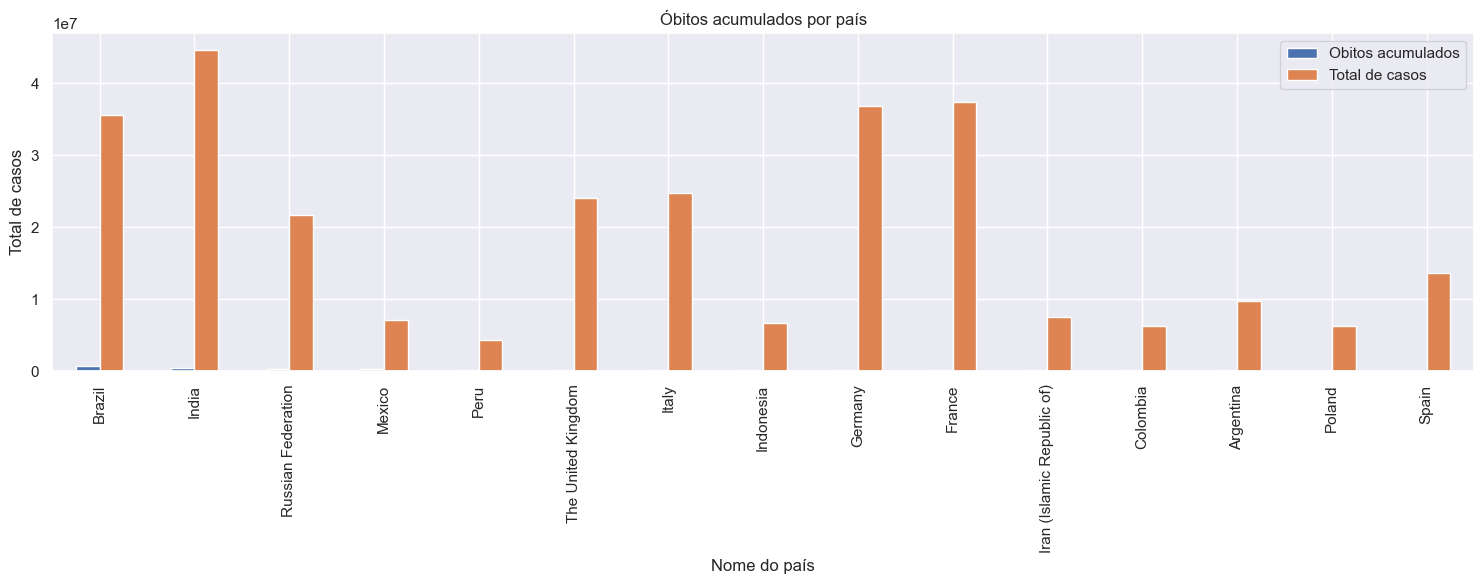

In [31]:
#Gráfico de barra dos óbitos por país
casos = (df1.iloc[2::].groupby('País')[['Obitos acumulados', 'Total de casos']].max().sort_values(by=['Obitos acumulados','Total de casos'], ascending = False))[:15]
fig, ax = plt.subplots(figsize=(15,6))

casos.plot(kind='bar', ax=ax)
ax.set_title('Óbitos acumulados por país')
ax.set_ylabel('Total de casos')
ax.set_xlabel('Nome do país')
plt.tight_layout()

In [36]:
x = df['País'].value_counts().index
y = df['País'].value_counts().values
plt.figure(figsize = (15, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.plot()

ValueError: Grouper and axis must be same length

<Figure size 1500x500 with 0 Axes>